# **Kelompok 6**


1.   Dimas Aditya Nugraha
2.   Farhan Faturrachman
1.   Helmi ilmawan






# Business Understanding

Tujuan bisnis dari keseluruhan proses ini adalah membangun sistem deteksi kantuk (mata terbuka vs tertutup) yang nantinya bisa digunakan pada aplikasi real-time (web/Android) untuk meningkatkan keselamatan (misalnya pengemudi).

## Project Domain
Perkembangan teknologi Machine Learning dan Computer Vision memungkinkan sistem untuk mengenali kondisi manusia secara otomatis melalui citra visual. Salah satu penerapannya adalah deteksi kantuk berdasarkan kondisi mata, yang sangat relevan dalam bidang keselamatan berkendara dan pemantauan aktivitas manusia. Kantuk yang tidak terdeteksi dapat meningkatkan risiko kecelakaan, terutama pada pengemudi kendaraan. Oleh karena itu, proyek ini berfokus pada pemanfaatan Convolutional Neural Network (CNN) untuk mengklasifikasikan kondisi mata terbuka dan tertutup sebagai indikator awal tingkat kantuk secara otomatis dan real-time.


## Problem Statements


1.   Sulitnya mendeteksi kondisi kantuk seseorang secara manual dan konsisten, terutama dalam situasi yang membutuhkan pemantauan berkelanjutan seperti saat mengemudi.
2.   Belum adanya sistem ringan dan efisien yang mampu melakukan klasifikasi mata terbuka dan tertutup secara real-time serta dapat diimplementasikan pada platform berbasis web atau perangkat mobile.
1.   Diperlukan model Machine Learning yang tidak hanya akurat, tetapi juga dapat dikonversi ke format yang ringan seperti TensorFlow Lite untuk kebutuhan implementasi.






## Goals


1.   Membangun model Machine Learning berbasis CNN yang mampu mengklasifikasikan kondisi mata terbuka dan tertutup dengan tingkat akurasi yang baik.

1.   Menghasilkan model yang efisien dan ringan sehingga dapat digunakan untuk deteksi kantuk secara real-time.
2.  Mengonversi model ke format TensorFlow Lite (.tflite) agar dapat diintegrasikan ke dalam aplikasi web atau Android.




## Solution Statements


1.   Menggunakan dataset MRL Eye dari Kaggle sebagai sumber data citra mata terbuka dan tertutup untuk proses pelatihan model.

1.   Melakukan data preparation berupa normalisasi, augmentasi data, serta pembagian data latih dan data validasi untuk meningkatkan kemampuan generalisasi model.
2. Menerapkan arsitektur Convolutional Neural Network (CNN) dengan beberapa convolution layer, max pooling, dan dropout untuk mengurangi overfitting.


2.   Melakukan evaluasi performa model menggunakan metrik akurasi dan loss, serta visualisasi grafik training dan validation.


1.  Mengonversi model yang telah dilatih ke format TensorFlow Lite sebagai tahap deployment agar siap digunakan dalam sistem deteksi kantuk berbasis real-time.






# Data Understanding



In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"helmiilmawan","key":"ad46f1fc6db144da32fc2a3cb62bffb6"}'}

Digunakan untuk mengunggah file kaggle.json, yaitu kredensial akses dataset, sehingga kita dapat memahami dan mengakses sumber data eksternal (dataset Kaggle).

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Tahap ini menyiapkan akses ke sumber data (Kaggle API) agar dataset dapat diambil dan dieksplorasi.

In [ ]:
!kaggle datasets download -d tauilabdelilah/mrl-eye-dataset

Dataset URL: https://www.kaggle.com/datasets/tauilabdelilah/mrl-eye-dataset
License(s): unknown
 94% 310M/330M [00:00<00:00, 901MB/s] 
100% 330M/330M [00:00<00:00, 739MB/s]


Digunakan untuk mengambil dataset MRL Eye yang berisi citra mata terbuka dan tertutup sebagai dasar analisis.

In [ ]:
!mkdir mrl-eye-dataset
!unzip mrl-eye-dataset.zip -d mrl-eye-dataset
!ls mrl-eye-dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05432_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05433_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05434_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05435_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05436_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05437_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05438_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05439_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05440_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05441_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/s0036_05442_1_1_1_0_0_01.png  
  inflating: mrl-eye-dataset/data/train/open eyes/

Tahap ini bertujuan untuk melihat struktur dan isi dataset, memastikan data berhasil diunduh dan siap diproses.

# Data Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'mrl-eye-dataset/data/train'

print("Isi folder dataset:", os.listdir(base_dir))

# 2. Buat Image Data Generator
# rescale 1/255 agar nilai pixel 0-1
# validation_split=0.2 artinya 20% data dipakai untuk tes akurasi (validasi)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,      # Sedikit rotasi agar model lebih pintar
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

# 3. Load Data Training
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),   # Ubah ukuran gambar jadi 64x64 (Cukup untuk mata & ringan)
    batch_size=32,
    class_mode='binary',    # Karena hanya ada 2 kelas: Open vs Closed
    subset='training',
    shuffle=True
)

# 4. Load Data Validasi
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

print("Label mapping:", train_generator.class_indices)

Isi folder dataset: ['close eyes', 'open eyes']
Found 65340 images belonging to 2 classes.
Found 16335 images belonging to 2 classes.
Label mapping: {'close eyes': 0, 'open eyes': 1}


Tahap ini melakukan persiapan data, meliputi:

*   Normalisasi pixel (rescale 1/255)
*  Augmentasi data (rotasi, zoom, shift)
*   Pembagian data training dan validation
*   Penyesuaian ukuran gambar (64×64)

Data disiapkan agar siap digunakan oleh model CNN.

# Modelling

In [ ]:
model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten: Mengubah matriks gambar menjadi array 1 dimensi untuk masuk ke ANN biasa
    tf.keras.layers.Flatten(),

    # Dropout untuk mencegah overfitting (menghafal data)
    tf.keras.layers.Dropout(0.5),

    # Dense Layer (ANN Biasa)
    tf.keras.layers.Dense(512, activation='relu'),

    # Output Layer (1 neuron karena binary classification)
    # Gunakan sigmoid agar outputnya 0 sampai 1 (probabilitas)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Tahap ini membangun arsitektur model CNN, meliputi:

*  Convolutional layer
*  Max pooling
*   Dropout
*   Dense layer
* Output sigmoid untuk klasifikasi biner

Model disesuaikan dengan karakteristik citra mata.

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 144s 70ms/step - accuracy: 0.9632 - loss: 0.1023 - val_accuracy: 0.9377 - val_loss: 0.1569
Epoch 2/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 1.0000 - loss: 0.0444 - val_accuracy: 0.9406 - val_loss: 0.1539
Epoch 3/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9728 - loss: 0.0777 - val_accuracy: 0.9395 - val_loss: 0.1538
Epoch 4/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9375 - loss: 0.3354 - val_accuracy: 0.9385 - val_loss: 0.1569
Epoch 5/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - accuracy: 0.9762 - loss: 0.0686 - val_accuracy: 0.9011 - val_loss: 0.2364
Epoch 6/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9375 - loss: 0.0938 - val_accuracy: 0.9040 - val_loss: 0.2284
Epoch 7/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 140s 68ms/step - accuracy: 0.9785 - loss: 0.0614 - val_accuracy: 0.8987 - val_loss: 0.2987
Epoch 8/10
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 1.00

Tahap ini melakukan pelatihan model (training) menggunakan data latih dan data validasi untuk mempelajari pola mata terbuka dan tertutup.

# Evalution

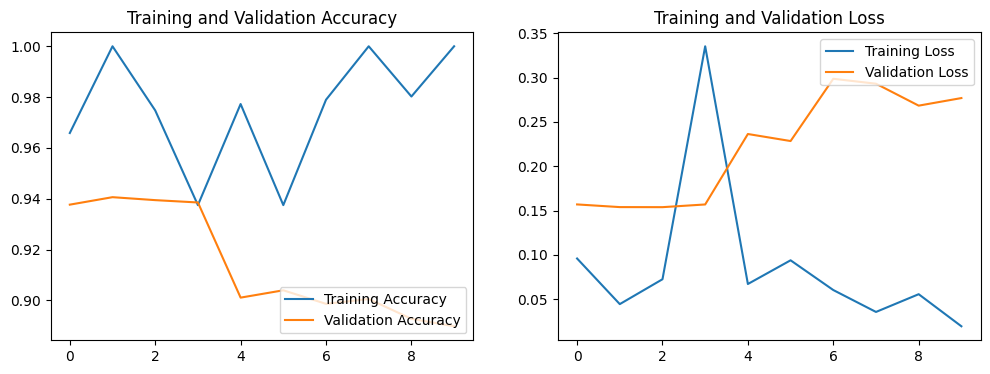

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Digunakan untuk mengevaluasi performa model, dengan melihat:

*   Akurasi training vs validation
*   Loss training vs validation

Grafik ini membantu menilai apakah model mengalami overfitting atau underfitting.

In [ ]:
print(f"Validation Loss: {val_loss[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")

Validation Loss: 0.2769
Validation Accuracy: 0.8898


In [ ]:
import numpy as np

# Ambil satu batch dari generator validasi
images, labels = next(validation_generator)

# Lakukan prediksi
predictions = model.predict(images)

# Cetak hasil prediksi untuk beberapa contoh
print("Prediksi Probabilitas (0-1) untuk 'Closed Eyes' (0) dan 'Open Eyes' (1):")
for i in range(min(5, len(predictions))):
    predicted_prob = predictions[i][0]
    true_label_index = np.where(labels[i] == 1)[0][0] if labels[i].ndim > 0 else labels[i]
    true_label_name = 'Open Eyes' if true_label_index == 1 else 'Closed Eyes'

    # Menentukan kelas prediksi berdasarkan probabilitas
    predicted_class_name = 'Open Eyes' if predicted_prob > 0.5 else 'Closed Eyes'

    print(f"Gambar {i+1}: Prediksi = {predicted_prob:.4f}, Kelas Prediksi = {predicted_class_name}, Label Sebenarnya = {true_label_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Prediksi Probabilitas (0-1) untuk 'Closed Eyes' (0) dan 'Open Eyes' (1):
Gambar 1: Prediksi = 0.9980, Kelas Prediksi = Open Eyes, Label Sebenarnya = Open Eyes
Gambar 2: Prediksi = 1.0000, Kelas Prediksi = Open Eyes, Label Sebenarnya = Open Eyes
Gambar 3: Prediksi = 1.0000, Kelas Prediksi = Open Eyes, Label Sebenarnya = Open Eyes
Gambar 4: Prediksi = 0.9913, Kelas Prediksi = Open Eyes, Label Sebenarnya = Open Eyes
Gambar 5: Prediksi = 0.7935, Kelas Prediksi = Open Eyes, Label Sebenarnya = Closed Eyes


# Deployment

In [ ]:
# 1. Simpan model format H5
model.save("deteksi-kantuk.h5")

# 2. Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 3. Simpan file .tflite
with open('deteksi-kantuk.tflite', 'wb') as f:
    f.write(tflite_model)

print("Berhasil membuat file deteksi-kantuk.tflite!")

from google.colab import files
files.download('deteksi-kantuk.tflite')

Saved artifact at '/tmp/tmpo4lau213'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139504283731536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283732304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283731920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283734416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283733648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283735376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283734992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283731728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283734224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139504283734032: TensorSpec(shape=(), dtype=tf.resource, name=None)
Berhasil membuat f

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tahap ini menyiapkan model agar siap digunakan di aplikasi nyata, dengan:



*   Menyimpan model Keras (.h5)

*   Mengonversi ke format TensorFlow Lite (.tflite)
*   Model siap diintegrasikan ke Android / Web / Streamlit real-time






